In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0, 0.5, 'y output')

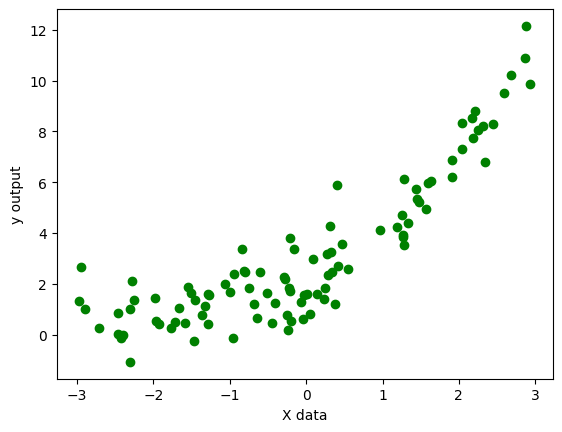

In [11]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)
plt.scatter(X, y, color='g')
plt.xlabel("X data")
plt.ylabel("y output")

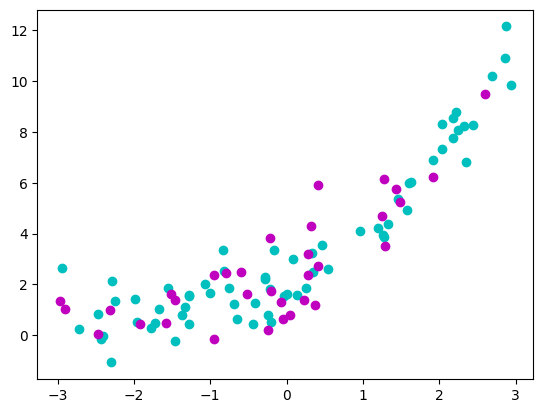

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=69)

plt.scatter(X_train, y_train, c='c')
plt.scatter(X_test, y_test, c='m')

<Axes: >

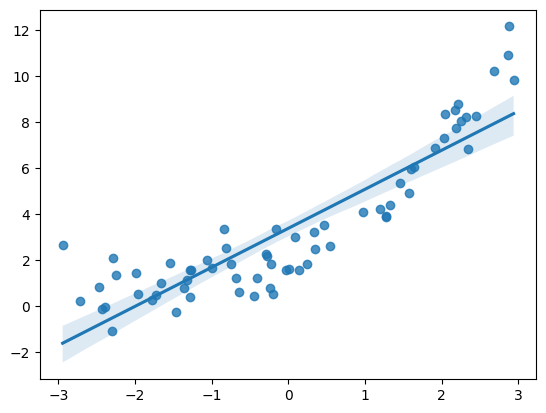

In [53]:
import seaborn as sns
sns.regplot(x=X_train, y=y_train)

In [46]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [47]:
regression.fit(X_train, y_train)

LinearRegression()

In [48]:
from sklearn.metrics import r2_score
score = r2_score(y_test, regression.predict(X_test))
score

0.4894916061117981

Text(0, 0.5, 'y')

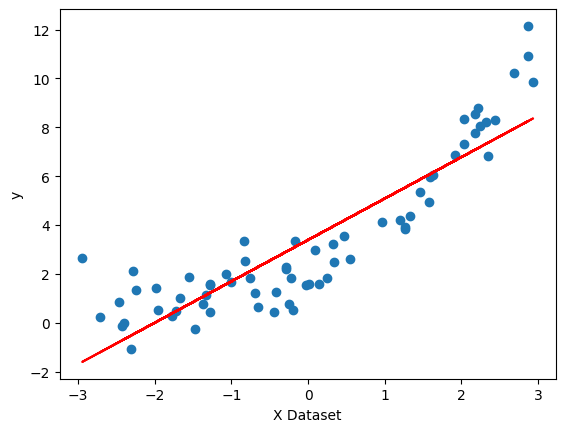

In [79]:
plt.plot(X_train, regression.predict(X_train), 'r-')
plt.scatter(X_train, y_train)
plt.xlabel('X Dataset')
plt.ylabel('y')

In [129]:
# lets apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4, include_bias=True)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [130]:
# [1, x1^1, x1^2]
# X_train_poly


In [131]:
from sklearn.metrics import r2_score

reg_poly = LinearRegression()
reg_poly.fit(X_train_poly, y_train)

score_poly = r2_score(y_test, reg_poly.predict(X_test_poly))
print(score, score_poly)

0.4894916061117981 0.7595311104188947


Text(0, 0.5, 'y')

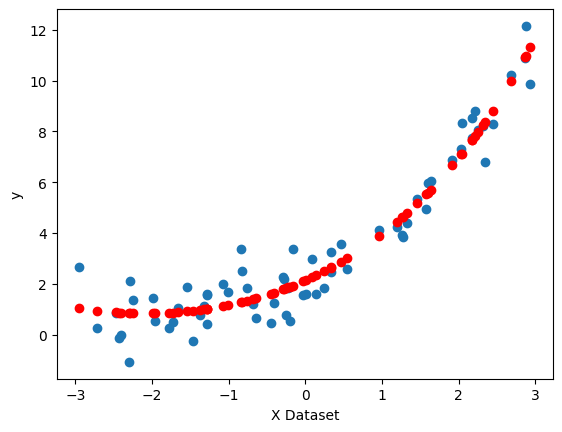

In [141]:
plt.plot(X_train, reg_poly.predict(X_train_poly), 'ro')
plt.scatter(X_train, y_train)
plt.xlabel('X Dataset')
plt.ylabel('y')

In [142]:
# Predict new dataset
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

y_new = reg_poly.predict(X_new_poly)

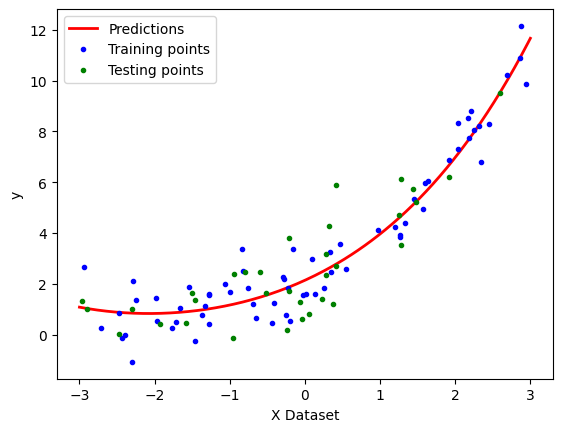

In [155]:
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.plot(X_train, y_train, 'b.', label='Training points')
plt.plot(X_test, y_test, 'g.', label='Testing points')
plt.xlabel('X Dataset')
plt.ylabel('y')
plt.legend()
# plt.show()